<div  align = middle style="font-size:250%;font-weight:bold">
    MNIST 数据集的解析
</div>


***

| 文件版本 |    修改内容    |  修改者/时间   |
| :-: | :-: | :-: |
|   V0.1   | 首次编写该文档 | YQW/2020.10.25 |


***

## 1.  数据说明

+ 数据来源:[THE MNIST DATABASE of handwritten digits](http://yann.lecun.com/exdb/mnist/)
+ 数据包信息:

|Package name | Contents|
|  :-:  | :-:  |
|Training set images | 60,000 个样本|
|Training set labels | 60,000 个标签|
|Test set images| 10,000 个样本|
|Test set labels| 10,000 个标签|

+ 注意：gz文件是压缩文件，需要再次解压，否则无法进行二进制读取。


## 2.  Ref
+ [THE MNIST DATABASE of handwritten digits](http://yann.lecun.com/exdb/mnist/)
+ [详解 MNIST 数据集](https://blog.csdn.net/simple_the_best/article/details/75267863)
+ [jupyter入门之Matplotlib](https://blog.csdn.net/weixin_42042680/article/details/80738699)


## 3.  Code

magic1 = 0x     801
num   = 10000
magic2 = 0x     803
rows = 28
cols = 28


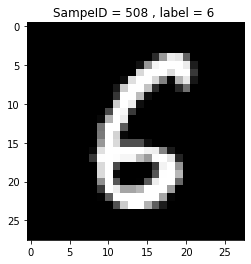

In [3]:
# -*- coding: utf-8 -*-
"""
Ref:
https://blog.csdn.net/simple_the_best/article/details/75267863
http://yann.lecun.com/exdb/mnist/
https://blog.csdn.net/weixin_42042680/article/details/80738699
"""


#设置成在jupyter中展示图片
%matplotlib inline  

import os
import struct
import random
import matplotlib.pyplot as plt
import numpy as np


def load_mnist(dir_path , kind='train'):
    """
    Load MNIST data from 'dir_path'
    """
    
    labels_path = os.path.join(dir_path,'%s-labels-idx1-ubyte'%kind)
    images_path = os.path.join(dir_path,'%s-images-idx3-ubyte'%kind)
    
    
    with open(labels_path,'rb')  as lbpath:
        magic , num =   struct.unpack('>II',lbpath.read(8)) # > 大端((MSB first) I 一个无符号数
        print('magic1 = 0x%8x' % magic)
        print('num   = {}'.format(str(num)))
        labels      =   np.fromfile(lbpath,dtype=np.uint8)
        
    with  open(images_path,'rb') as imgpath:
        magic,num,rows,cols = struct.unpack('>IIII',imgpath.read(16))
        images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels),784);
        print('magic2 = 0x%8x' % magic)
        print("rows = {}".format(str(rows)))
        print("cols = {}".format(str(cols)))
        
        
    return images,labels
    
    
if __name__ == '__main__':

    mnist_dir_path = 'D:/DATA/MNIST_data/'
    images, labels = load_mnist(mnist_dir_path,'t10k') # 't10k' or 'train'
    rand_idx = random.randint(0,len(labels)-1)
    plt.imshow(images[rand_idx].reshape(28,28),'gray')
    plt.title('SampeID = {} , label = {} '.format(str(rand_idx),str(labels[rand_idx])))